<h1> Использование методов машинного обучения для классификации текстов описаний товаров </h1>

## Оглавление: <a class="anchor" id="0"></a>

* [1. Описание проблемы](#1) 

* [2. Загрузка библиотек](#2) 

* [3. Загрузка датасета](#3)

* [4. Анализ данных](#4)
     
* [5. Предобработка данных](#5)

* [6. Векторизация](#6)


* [7. Обучение моделей](#7)
    * [7.1. Logistic Regression](#7.1)
    * [7.2. K Neighbors Classifier](#7.2)
    * [7.3. Decision Tree](#7.3)
    * [7.4. Support Vector Machine](#7.4)
    * [7.5. Result](#7.5)


* [8. Векторизация](#8)


* [9. Обучение моделей](#9)
    * [9.1. Logistic Regression](#9.1)
    * [9.2. K Neighbors Classifier](#9.2)
    * [9.3. Decision Tree](#9.3)
    * [9.4. Support Vector Machine](#9.4)
    * [9.5. Result](#9.5)


* [10. Подбор гиперпараметров](#10)

* [11. Заключение](#11)

<a id="1"></a>
## <b>1 <span style='color:#4682B4'>|</span> Описание проблемы </b>
* [К оглавлению](#0)

В настоящее время интернет-магазины становятся все более популярными среди потребителей, предоставляя им широкий выбор товаров и удобство онлайн-покупок. Однако, с ростом количества товаров в интернет-магазинах возникает проблема классификации и категоризации этих товаров, чтобы потребители могли быстро находить интересующие их предметы. Ручная классификация всех товаров является трудоемкой задачей и требует больших ресурсов, особенно в случае больших интернет-магазинов с тысячами и даже миллионами товарных позиций.

В этой связи использование методов машинного обучения для классификации товаров в интернет-магазине становится актуальной задачей. Машинное обучение предлагает эффективные алгоритмы и подходы, которые могут автоматизировать процесс классификации товаров на основе их атрибутов и характеристик. Это повышает эффективность интернет-магазина, что приводит к увеличению продаж, улучшению удовлетворенности клиентов и повышению конкурентоспособности бизнеса.

Целью данной курсовой работы является исследование и применение методов машинного обучения для классификации товаров. Основная задача состоит в разработке модели, способной классифицировать товары на основе имеющихся данных.


<a id="2"></a>
## <b>2 <span style='color:#4682B4'>|</span> Загрузка библиотек</b>
* [К оглавлению](#0)

Загрузим необходимые библиотеки

In [1]:
!pip install pymorphy2

In [2]:
import re
import nltk
import warnings
import scipy as sp
import numpy as np
import pandas as pd
from tqdm import tqdm
from functools import lru_cache
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import word_tokenize

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             classification_report)
plt.rcdefaults()
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
nltk.download('stopwords')
nltk.download('punkt')
print('Libraries Imported')

Libraries Imported


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madvas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/madvas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="3"></a>
## <b>3 <span style='color:#4682B4'>|</span> Загрузка датасета</b>
* [К оглавлению](#0)

Загрузим набор данных, предоставленный научным руководителем Блохиным Н.В.

In [3]:
data = pd.read_json('parsed.json')
data.head()

,ID,Title,Price,Presence,Goods_rating,Info,Nesting_type_tags,Provider,Provider_address,Last_provider_activity,Link_to_provider,Link_to_good,Attached_files
0,9513200,Доска пола; Имитация бруса; Блок-хаус; Декинг;...,33 800 руб.,В наличии,Популярный товар,"[Толщина (мм): 20/45, ширина (мм): 90/135/140,...","[Товары и услуги, Строительные материалы, Пого...","Сибирский лес, торгово-строительная компания (...","Барнаул, г.Новоалтайск, ул.Промплощадка,13а",Был на сайте 31.10.2022,https://supl.biz/profiles/1223111/,https://supl.biz/doska-pola-imitatsiya-brusa-b...,NaN
1,26390427,"Вагонка, блок хаус, доска пола, строганная дос...",Цена по запросу,В наличии,Популярный товар,"[Продаем погонажные изделия хвойных пород, шир...","[Товары и услуги, Строительные материалы, Пого...",ООО Лестех43,Киров,Был на сайте 18.10.2022,https://supl.biz/profiles/1983162/,https://supl.biz/vagonka-blok-haus-doska-pola-...,https://suplbiz-a.akamaihd.net/media/proposals...
2,27214727,"Погонажные изделия, вагонка, евровагонка, имит...",Цена по запросу,В наличии,нет информации о популярности товара,[Собственное производство в Архангельской обла...,"[Товары и услуги, Строительные материалы, Пого...",ИП Зыков Александр Викторович,Архангельск,Был на сайте 01.11.2022,https://supl.biz/profiles/2007598/,https://supl.biz/pogonazhnyie-izdeliya-vagonka...,NaN
3,21552207,Технические входные двери,Цена по запросу,В наличии,Популярный товар,[Двери входные технические металлические для ...,"[Товары и услуги, Строительные материалы, Воро...",ООО Дверная Лига,Краснодар,Был на сайте 05.10.2022,https://supl.biz/profiles/1152027/,https://supl.biz/tehnicheskie-dveri-p21552207/,NaN
4,21605289,Тротуарная плитка Искусственный камень,1 200 руб.,Под заказ,Популярный товар,[Компания ООО Ингстром производит тротуарную п...,"[Товары и услуги, Строительные материалы, Кирп...",ООО Ингстром,Назрань,Был на сайте 24.11.2021,https://supl.biz/profiles/1677244/,https://supl.biz/trotuarnaya-plitka-bruschatka...,https://suplbiz-a.akamaihd.net/media/proposals...


<a id="4"></a>
## <b>4 <span style='color:#4682B4'>|</span> Анализ данных</b>
* [К оглавлению](#0)

В датасете представлены следующие данные:
1. ID
2. Title (название товара)
3. Price (цена)
4. Goods_rating (популярность товара)
5. Info (описание товара)
6. Nesting_type_tags (цепочка категорий (тегов) товара)
7. Provider (производитель)
8. Provider_address (адрес производителя)
9. Last_provider_activity (дата последнего нахождения на сайте)
10. Link_to_provider (ссылка на профиль производителя)
11. Link_to_good (ссылка на страницу товара)
12. Attached_files (прикрепленные файлы)

Приведем описания товаров к строковому типу и разделим цепочки категорий по столбцам

In [4]:
data['Info'] = data['Info'].astype(str).apply(lambda x: x[2:-2])

data[[f"Tag_{idx+1}" for idx in range(8)]] = data["Nesting_type_tags"].apply(pd.Series)
data.drop(['Nesting_type_tags'], axis=1, inplace=True)

data.head()

,ID,Title,Price,Presence,Goods_rating,Info,Provider,Provider_address,Last_provider_activity,Link_to_provider,Link_to_good,Attached_files,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8
0,9513200,Доска пола; Имитация бруса; Блок-хаус; Декинг;...,33 800 руб.,В наличии,Популярный товар,"Толщина (мм): 20/45, ширина (мм): 90/135/140, ...","Сибирский лес, торгово-строительная компания (...","Барнаул, г.Новоалтайск, ул.Промплощадка,13а",Был на сайте 31.10.2022,https://supl.biz/profiles/1223111/,https://supl.biz/doska-pola-imitatsiya-brusa-b...,NaN,Товары и услуги,Строительные материалы,Погонажные изделия,NaN,NaN,NaN,NaN,NaN
1,26390427,"Вагонка, блок хаус, доска пола, строганная дос...",Цена по запросу,В наличии,Популярный товар,"Продаем погонажные изделия хвойных пород, широ...",ООО Лестех43,Киров,Был на сайте 18.10.2022,https://supl.biz/profiles/1983162/,https://supl.biz/vagonka-blok-haus-doska-pola-...,https://suplbiz-a.akamaihd.net/media/proposals...,Товары и услуги,Строительные материалы,Погонажные изделия,NaN,NaN,NaN,NaN,NaN
2,27214727,"Погонажные изделия, вагонка, евровагонка, имит...",Цена по запросу,В наличии,нет информации о популярности товара,Собственное производство в Архангельской облас...,ИП Зыков Александр Викторович,Архангельск,Был на сайте 01.11.2022,https://supl.biz/profiles/2007598/,https://supl.biz/pogonazhnyie-izdeliya-vagonka...,NaN,Товары и услуги,Строительные материалы,Погонажные изделия,NaN,NaN,NaN,NaN,NaN
3,21552207,Технические входные двери,Цена по запросу,В наличии,Популярный товар,Двери входные технические металлические для п...,ООО Дверная Лига,Краснодар,Был на сайте 05.10.2022,https://supl.biz/profiles/1152027/,https://supl.biz/tehnicheskie-dveri-p21552207/,NaN,Товары и услуги,Строительные материалы,"Ворота, двери",NaN,NaN,NaN,NaN,NaN
4,21605289,Тротуарная плитка Искусственный камень,1 200 руб.,Под заказ,Популярный товар,Компания ООО Ингстром производит тротуарную пл...,ООО Ингстром,Назрань,Был на сайте 24.11.2021,https://supl.biz/profiles/1677244/,https://supl.biz/trotuarnaya-plitka-bruschatka...,https://suplbiz-a.akamaihd.net/media/proposals...,Товары и услуги,Строительные материалы,"Кирпич, бетоноблоки, шлакоблоки",NaN,NaN,NaN,NaN,NaN


Определим целевую переменную классификации

In [5]:
data.nunique()

ID                        157068
Title                     136020
Price                      49985
Presence                       4
Goods_rating                   2
Info                       91416
Provider                    2989
Provider_address            2036
Last_provider_activity       743
Link_to_provider            3134
Link_to_good              157068
Attached_files               752
Tag_1                          1
Tag_2                         22
Tag_3                        246
Tag_4                        783
Tag_5                       1938
Tag_6                       1405
Tag_7                        149
Tag_8                         10
dtype: int64

Так как первая категория у всех одинакова, сосредоточимся на определении более специфической классификации, основанной на второй категории

Признаками, на основе которых определяется категория товара, являются:
1. Title (название товара)
2. Info (описание товара)
3. Provider (производитель)

Остальные переменные никак не влияют на категорию товара, следовательно их можно удалить

In [6]:
data.drop(['Last_provider_activity', 'Price', 'Link_to_good', 'Link_to_provider', 'Attached_files','Presence','ID','Provider_address','Goods_rating', 
           'Tag_1','Tag_3','Tag_4', 'Tag_5', 'Tag_6', 'Tag_7', 'Tag_8'], axis=1, inplace=True)
data.columns = ['Title', 'Info', 'Provider', 'Tag']

Избавимся от пропусков и дубликатов в датасете

In [7]:
data.dropna(subset=['Title', 'Info', 'Provider', 'Tag'], inplace=True)
data.drop_duplicates(inplace=True)
data.shape[0]

147235

В датасете присутствует 147235 уникальных товаров

Исследуем распределение товаров по категориям

In [8]:
data['Tag'].value_counts()

Оборудование и инструменты                 65315
Строительные материалы                     45421
Автотовары                                 10783
Строительство                               9941
Одежда, обувь, игрушки                      4516
Электроника и электротехника                3631
Металлы                                     1653
Спорт. туризм. отдых                        1653
Продукты питания, напитки                   1335
Транспортные услуги                          858
Компьютеры, бытовая и офисная техника        527
Хозтовары, упаковка, канцелярия              515
Полиграфия и реклама                         372
Мебель и фурнитура                           361
Юридические, финансовые и бизнес-услуги      172
Химия и топливо                               63
Коммунальные услуги                           49
Текстиль для дома                             21
Охрана и безопасность                         21
Ит. интернет. связь.                          15
Потребительские това

In [9]:
data['Tag'].value_counts().describe()

count       22.000000
mean      6692.500000
std      16331.758817
min          2.000000
25%         52.500000
50%        521.000000
75%       3136.500000
max      65315.000000
Name: Tag, dtype: float64

Построим гистограмму размеров категорий с логарифмической шкалой

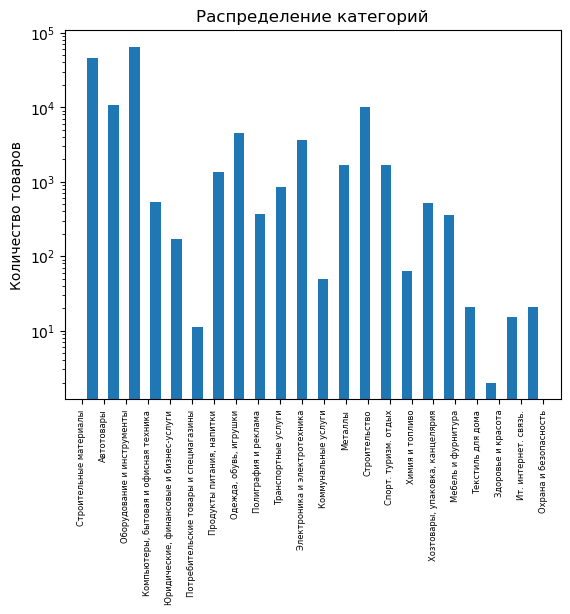

In [10]:
plt.hist(data['Tag'], bins=data['Tag'].nunique(), rwidth=0.5)
plt.xticks(rotation=90, fontsize=6)
plt.yscale('log')  
plt.ylabel('Количество товаров')
plt.title('Распределение категорий')
plt.show()

<a id="5"></a>
## <b>5 <span style='color:#4682B4'>|</span> Предобработка данных</b>
* [К оглавлению](#0)

Произведем препроцессинг, он будет включать в себя следующие пункты:
1. Приведение текста к нижнему регистру
2. Удаление всех символов, не являющихся буквами русского или английского языка
3. Токенизация (разбиение текста на отдельные слова)
4. Удаление слов, которые не вносят никакой дополнительной информации в текст (стоп-слов) при помощи модуля nltk.corpus
5. Приведение всех слов к начальной форме путем лемматизации при помощи библиотеки pymorphy2

In [11]:
# токенизация
regex = re.compile("[А-Яа-яA-z]+")

def tokenize_text(text):
    try:
        return regex.findall(text.lower())
    except:
        return []

# удаление стоп-слов
stop_words = set(stopwords.words('russian'))

def remove_stopwords(tokens):
    return [token for token in tokens if not token in stop_words]

# лемматизация
morph = MorphAnalyzer()

@lru_cache(maxsize=128)
def lemmatize_word(word):
    return morph.parse(word)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(word) for word in text]

def preprocess_text(text):
    tokens = tokenize_text(text)
    clean_text = remove_stopwords(tokens)
    return ' '.join(lemmatize_text(clean_text))

In [12]:
data['Title_lem'] = [preprocess_text(text) for text in tqdm(data['Title'])]
data['Info_lem'] = [preprocess_text(text) for text in tqdm(data['Info'])]
data['Provider_lem'] = [preprocess_text(text) for text in tqdm(data['Provider'])]

data.head()

100%|████████████████████████████████| 147235/147235 [00:01<00:00, 78206.43it/s]


,Title,Info,Provider,Tag,Title_lem,Info_lem,Provider_lem
0,Доска пола; Имитация бруса; Блок-хаус; Декинг;...,"Толщина (мм): 20/45, ширина (мм): 90/135/140, ...","Сибирский лес, торгово-строительная компания (...",Строительные материалы,доска пол имитация брус блок хаус декинг строг...,толщина мм ширина мм длина мм цена указать сорт,сибирский лес торговый строительный компания о...
1,"Вагонка, блок хаус, доска пола, строганная дос...","Продаем погонажные изделия хвойных пород, широ...",ООО Лестех43,Строительные материалы,вагонка блок хаус доска пол строгать доска ими...,продавать погонажный изделие хвойный порода ши...,ооо лестёха
2,"Погонажные изделия, вагонка, евровагонка, имит...",Собственное производство в Архангельской облас...,ИП Зыков Александр Викторович,Строительные материалы,погонажный изделие вагонка евровагонка имитаци...,собственный производство архангельский область...,ип зык александр викторович
3,Технические входные двери,Двери входные технические металлические для п...,ООО Дверная Лига,Строительные материалы,технический входной дверь,дверь входной технический металлический подсоб...,ооо дверной лига
4,Тротуарная плитка Искусственный камень,Компания ООО Ингстром производит тротуарную пл...,ООО Ингстром,Строительные материалы,тротуарный плитка искусственный камень,компания ооо ингстром производить тротуарный п...,ооо ингстром


<a id="6"></a>
## <b>6 <span style='color:#4682B4'>|</span> Векторизация </b>
* [К оглавлению](#0)

Текстовые данные не могут быть использованы непосредственно в алгоритмах машинного обучения, поэтому требуется преобразовать их в числовые векторы. Этот процесс называется векторизацией. Произведем его одним из наиболее распространенных методов, а именно при помощи мешка слов (Bag-of-Words) из библиотеки sklearn

Для начала будем использовать только признак, содержащий описание товара (Info). Разделим данные на обучающую и тестовую выборки и векторизируем их

In [13]:
X = data['Info_lem']
y = data['Tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

vec = CountVectorizer()
X_train_v = vec.fit_transform(X_train)
X_test_v = vec.transform(X_test)

<a id="7"></a>
## <b>7 <span style='color:#4682B4'>|</span> Обучение моделей</b>
* [К оглавлению](#0)

Перейдем к обучению нескольких моделей.

Создадим таблицу, куда будем вносить полученные значения метрик.

Будем использовать следующие метрики:
1. **Precision (точность)** измеряет, какая доля положительно классифицированных примеров действительно является положительными. Она предоставляет информацию о способности модели избегать ложных положительных результатов
2. **Recall (полнота)** измеряет, какая доля положительных примеров модель способна обнаружить. Она позволяет оценить способность модели избегать ложных отрицательных результатов
3. **F1-score** является гармоническим средним между точностью и полнотой. Она предоставляет общую меру производительности классификационной модели
4. **Accuracy (точность классификации)** представляет собой общую долю правильно классифицированных примеров по отношению ко всем примерам

In [14]:
results1 = pd.DataFrame({'Model': [],
                        'F1-score': [],
                        'Precision': [],
                        'Recall': [],
                        'Accuracy': []})

<a id="7.1"></a>
### <b>7.1 <span style='color:#4682B4'>|</span> Logistic Regression</b>

**Логистическая регрессия** - это метод машинного обучения, который основывается на логистической функции, преобразующей линейную комбинацию признаков в вероятность. В процессе обучения модель находит оптимальные веса признаков. Затем она использует сигмоидную функцию для преобразования в число от 0 до 1, что соответствует вероятности.

In [15]:
%%time
model = LogisticRegression()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred,average='macro')
acc = accuracy_score(y_test, y_pred)

results1.loc[len(results1)] = ['Logistic Regression', round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 1min 53s, sys: 19.5 s, total: 2min 13s
Wall time: 21.3 s


<a id="7.2"></a>
### <b>7.2 <span style='color:#4682B4'>|</span> K Neighbors Classifier</b>

**K ближайших соседей** - алгоритм классификации, который использует близость объектов для определения класса новых данных. Он выбирает K ближайших соседей и присваивает новым данным класс, наиболее часто встречающийся среди этих соседей.

In [16]:
%%time
model = KNeighborsClassifier()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

results1.loc[len(results1)] = ['K Neighbors Classifier',  round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 55.2 s, sys: 18.2 s, total: 1min 13s
Wall time: 1min 17s


<a id="7.3"></a>
### <b>7.3 <span style='color:#4682B4'>|</span> Decision Tree</b>

**Дерево решений** представляет собой модель, которая использует древовидную структуру для классификации данных, основываясь на значениях различных признаков.

In [17]:
%%time
model = DecisionTreeClassifier()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

results1.loc[len(results1)] = ['Decision Tree', round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 14.6 s, sys: 98.7 ms, total: 14.7 s
Wall time: 14.7 s


<a id="7.4"></a>
### <b>7.4 <span style='color:#4682B4'>|</span> Ridge Classifier</b>

**Гребневой классификатор** - это линейный классификатор, который использует регуляризацию для балансировки модели и предотвращения переобучения.

In [18]:
%%time
model = RidgeClassifier()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

results1.loc[len(results1)] = ['Ridge Classifier', round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 24min 59s, sys: 4min 20s, total: 29min 19s
Wall time: 3min 58s


<a id="7.5"></a>
### <b>7.5 <span style='color:#4682B4'>|</span> Result</b>

Выведем метрики обученных моделей

In [19]:
results1.sort_values('F1-score', ascending=False)

,Model,F1-score,Precision,Recall,Accuracy
2,Decision Tree,0.68763,0.78329,0.63608,0.78236
3,Ridge Classifier,0.65693,0.77981,0.59422,0.77628
0,Logistic Regression,0.65349,0.80806,0.57347,0.78155
1,K Neighbors Classifier,0.63475,0.79363,0.55494,0.76604


Можно сделать вывод, что оптимальной является модель дерева решений. Она обучается быстрее остальных моделей (14.6 сек.) и имеет наибольшие значения F1-score и Accuracy. Однако, результат можно значительно улучшить, используя большее количество переменных. Поэтому обучим модели заново с использованием Info, Title и Provider

<a id="8"></a>
## <b>8 <span style='color:#4682B4'>|</span> Векторизация </b>
* [К оглавлению](#0)

Разделим данные на выборки, векторизируем и объединим входные при помощи функции sp.sparse.hstack из библиотеки SciPy. Она используется для горизонтального объединения разреженных матриц.

In [20]:
X = data[['Info_lem', 'Title_lem', 'Provider_lem']]
y = data['Tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

vec = CountVectorizer()
X_train_info = vec.fit_transform(X_train['Info_lem'])
X_test_info = vec.transform(X_test['Info_lem'])

vec = CountVectorizer()
X_train_title = vec.fit_transform(X_train['Title_lem'])
X_test_title = vec.transform(X_test['Title_lem'])

vec = CountVectorizer()
X_train_provider = vec.fit_transform(X_train['Provider_lem'])
X_test_provider = vec.transform(X_test['Provider_lem'])

X_train_v = sp.sparse.hstack([X_train_info, X_train_title, X_train_provider])
X_test_v = sp.sparse.hstack([X_test_info, X_test_title, X_test_provider])

<a id="9"></a>
## <b>9 <span style='color:#4682B4'>|</span> Обучение моделей</b>
* [К оглавлению](#0)

In [21]:
results2 = pd.DataFrame({'Model': [],
                        'F1-score': [],
                        'Precision': [],
                        'Recall': [],
                        'Accuracy': []})

<a id="9.1"></a>
### <b>9.1 <span style='color:#4682B4'>|</span> Logistic Regression</b>

In [22]:
%%time
model = LogisticRegression()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred,average='macro')
acc = accuracy_score(y_test, y_pred)

results2.loc[len(results2)] = ['Logistic Regression', round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 2min 53s, sys: 29.7 s, total: 3min 23s
Wall time: 32 s


<a id="9.2"></a>
### <b>9.2 <span style='color:#4682B4'>|</span> K Neighbors Classifier</b>

In [23]:
%%time
model = KNeighborsClassifier()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

results2.loc[len(results2)] = ['K Neighbors Classifier',  round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 1min 14s, sys: 25.6 s, total: 1min 39s
Wall time: 1min 43s


<a id="9.3"></a>
### <b>9.3 <span style='color:#4682B4'>|</span> Decision Tree</b>

In [24]:
%%time
model = DecisionTreeClassifier()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

results2.loc[len(results2)] = ['Decision Tree', round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 20.4 s, sys: 125 ms, total: 20.5 s
Wall time: 20.5 s


<a id="9.4"></a>
### <b>9.4 <span style='color:#4682B4'>|</span> Ridge Classifier</b>

In [25]:
%%time
model = RidgeClassifier()
model.fit(X_train_v, y_train)
y_pred = model.predict(X_test_v)

f1 = f1_score(y_test, y_pred, average='macro')
prec= precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

results2.loc[len(results2)] = ['Ridge Classifier', round(f1, 5), round(prec, 5), round(rec, 5), round(acc, 5)]

CPU times: user 29min 37s, sys: 5min 7s, total: 34min 45s
Wall time: 4min 41s


<a id="9.5"></a>
### <b>9.5 <span style='color:#4682B4'>|</span> Result</b>

Выведем метрики обученных моделей

In [26]:
results2.sort_values('F1-score', ascending=False)

,Model,F1-score,Precision,Recall,Accuracy
0,Logistic Regression,0.81859,0.84869,0.79682,0.95009
3,Ridge Classifier,0.81138,0.84512,0.79696,0.94800
2,Decision Tree,0.80552,0.80852,0.80614,0.94977
1,K Neighbors Classifier,0.74827,0.83388,0.72449,0.93184


Графически изобразим значения метрика F1-score моделей, обученных на разных входных данных

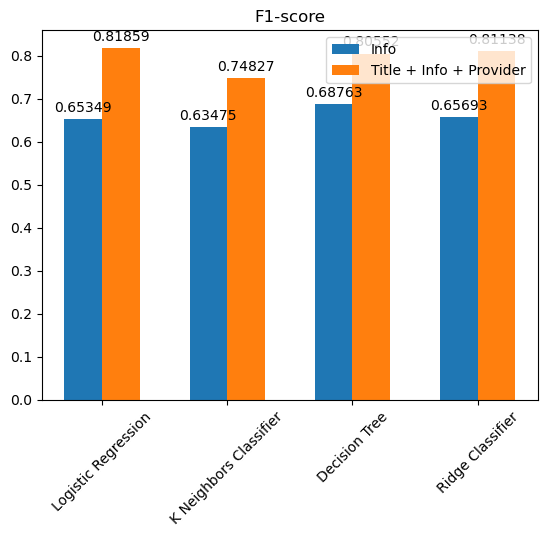

In [27]:
x = np.arange(4)

fig, ax = plt.subplots()

rects1 = ax.bar(x - 0.3/2, results1['F1-score'], 0.3, label='Info')
rects2 = ax.bar(x + 0.3/2, results2['F1-score'], 0.3, label='Title + Info + Provider')

for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, results1['F1-score'][i], ha='center', va='bottom')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, results2['F1-score'][i], ha='center', va='bottom')

ax.set_title('F1-score')
ax.set_xticks(x)
ax.set_xticklabels(list(results1['Model']), rotation=45)
ax.legend()
plt.show()

На графике видно, что использование всех трёх признаков улучшило результат и теперь наилучшей моделью является логистическая регрессия, обучаемая за 32 секунды, что является приемлемым результатом.

<a id="10"></a>
## <b>10 <span style='color:#4682B4'>|</span> Подбор гиперпараметров</b>
* [К оглавлению](#0)

F1-score модели равен 0.81859, а Accuracy равна 0.95009, однако эти показатели можно улучшить, подобрав оптимальные значения гиперпараметров при помощи Grid Search

Принцип работы GridSearchCV заключается в переборе заданного набора гиперпараметров и оценке производительности модели с каждой комбинацией параметров на кросс-валидации. После этого выбирается комбинация параметров, дающая наилучший результат, и возвращается модель, обученная с этими параметрами.

In [32]:
%%time
# сетка гиперпараметров
param_grid = {'penalty': ['l1', 'l2'],
              'C': [1, 10, 100],
              'solver': ['liblinear', 'lbfgs']}
lr = LogisticRegression()

# инициализируем Grid Search
r_search = GridSearchCV(lr, param_grid, cv=4, scoring='f1_macro')

r_search.fit(X_train_v, y_train)

# выводим лучшие гиперпараметры
print('Лучшие гиперпараметры', r_search.best_params_, '\n')

# обучаем модель на этих гиперпараметрах
best_lr = LogisticRegression(**r_search.best_params_)
best_lr.fit(X_train_v, y_train)

y_pred = best_lr.predict(X_test_v)

# вычисляем и выводим значения метрик
f1 = f1_score(y_test, y_pred, average='macro')
prec = precision_score(y_test, y_pred, average= 'macro')
rec = recall_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print(f'F1-score {round(f1, 5)}\nAccuracy {round(acc, 5)}\n')

Лучшие гиперпараметры {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'} 

F1-score 0.83296
Accuracy 0.95213

CPU times: user 2h 40min 47s, sys: 29min 47s, total: 3h 10min 35s
Wall time: 37min 4s


Подбор гиперпараметров позволил добиться улучшения модели.

F1 мера увеличилась с 0.81859 до 0.83296

Accuracy увеличилась с 0.95009 до 0.95213

<a id="11"></a>
## <b>11 <span style='color:#4682B4'>|</span> Заключение</b>
* [К оглавлению](#0)

Цель работы заключалась в разработке эффективной модели, способной автоматически определять категорию товара на основе его характеристик.

В процессе исследования мы рассмотрели различные алгоритмы машинного обучения, включая логистическую регресссию (Logistic Regression), метод k ближайших соседей (K Neighbours Classifier), дерево решений (Decision Tree Classifier) и гребневый классификатор (Ridge Classifier).

Мы провели предварительную обработку данных, включающую токенизацию, лемматизацию и векторизацию признаков, а так же разделение на обучающую и тестовую выборки.

Для оценки производительности моделей мы использовали несколько ключевых метрик, включая F1-меру, точность (precision), полноту (recall) и точность классификации (accuracy).

Также было проведено улучшение модели путем подбора оптимальных гиперпараметров.

В заключение, использование методов машинного обучения для классификации товаров представляет собой перспективное направление исследований. Это позволяет автоматизировать процесс классификации, улучшить точность и эффективность работы, а также снизить затраты и улучшить пользовательский опыт. Дальнейшее развитие и применение этих методов открывает новые возможности для бизнеса и общества в целом.